# Q Learning
### Introduction
Today, you'll learn about QLearning using the gym api.
> Gym is a standard API for reinforcement learning, and a diverse collection of reference environments.

Reinforcement learning is a subset of Artificial Intelligence. Our AI will learn by playing the same game over and over again until it learns what it must do in order to win.

In this workshop, you will:

1. Learn about Q Tables
2. Setup a gym environment
3. Train an AI to solve the FrozenLake environment

Let's start by importing the required libraries:

In [150]:
%pip install pygame
import random
import time
import gym
import numpy as np
import matplotlib.pyplot as plt

            .-/+oossssoo+/-.
        `:+ssssssssssssssssss+:`
      -+ssssssssssssssssssyyssss+-
    .ossssssssssssssssssdMMMNysssso.
   /ssssssssssshdmmNNmmyNMMMMhssssss/
  +ssssssssshmydMMMMMMMNddddyssssssss+
 /sssssssshNMMMyhhyyyyhmNMMMNhssssssss/
.ssssssssdMMMNhsssssssssshNMMMdssssssss.
+sssshhhyNMMNyssssssssssssyNMMMysssssss+
ossyNMMMNyMMhsssssssssssssshmmmhssssssso
ossyNMMMNyMMhsssssssssssssshmmmhssssssso
+sssshhhyNMMNyssssssssssssyNMMMysssssss+
.ssssssssdMMMNhsssssssssshNMMMdssssssss.
 /sssssssshNMMMyhhyyyyhdNMMMNhssssssss/
  +sssssssssdmydMMMMMMMMddddyssssssss+
   /ssssssssssshdmNNNNmyNMMMMhssssss/
    .ossssssssssssssssssdMMMNysssso.
      -+sssssssssssssssssyyyssss+-
        `:+ssssssssssssssssss+:`
            .-/+oossssoo+/-.
agherasie@alexandru-Predator 
---------------------------- 
OS: Ubuntu 22.04 LTS x86_64 
Host: Predator PH315-52 V1.04 
Kernel: 5.15.0-33-generic 
Uptime: 1 day, 6 hours, 13 mins 
Packages: 2604 (dpkg), 14 (snap) 
Shell: fish 3.3.1 
Resolution: 1920x10

## 1. Q-Learning

A simple example of Q-Learning: 

![Example of a Q-Learning Environment](./images/example.png)

A game where the AI must get to the “End” coordinates on the map in the shortest amount of time while avoiding the bombs and collecting the bonuses.

A Q-Table for this environment could be visualized like this. 

![Example of a Q-Table](./images/qtable.png)

With all of the possible actions listed horizontally and all of the possible states listed vertically.

If you wish to visualise this in python, run the following command:

In [151]:
# Initializing an empty table

qTable = np.zeros((5, 4))
print("Q-Table:\n" + str(qTable))

Q-Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In reinforcement learning, the AI receives a **reward** each time it **acts**:\
Here, the AI would likely receive a **negative reward** (-1) if it chooses to move to the right (because there's a bomb)\
However, if it went anywhere else, it would probably receive a **neutral reward** (0), since it would end up on blank squares.\
Assuming it decided to go to the right, the AI would encounter a bomb and the value for [Start, Move_Right] would decrease.\
In order to decide what its new value will be, we use the following formula:

![QFormula](./images/qformula.png)

#### Translation:

**Qnew(St, At)** = the new value for the current State and Action on our Qtable\
**Q(St, At)** = the old value for the current State and Action on our QTable\
**learning rate** = a constant value we use for our algorithm's learning speed (usually a number between 0.5 and 0.05)\
**reward** = the reward received (as per the example above, -1 if you hit a bomb)\
**discount factor** = another constant value we use to determine how good of a memory our AI has\
**estimate of optimal future value** = the value of the most profitable action at the new state

Let's try to implement this formula as a python function:\
(You can use the `optimal_future_value` variable and the `learning_rate` and `discount_factor` constants in your formula)

In [152]:
LEARNING_RATE = 0.05
DISCOUNT_RATE = 0.99

def qFunc(qTable, state, action, reward, newState):
    optimal_future_value = max(qTable[newState])
    ## enter your code here:
    Q_New = qTable[state, action] + LEARNING_RATE * (reward + DISCOUNT_RATE * optimal_future_value - qTable[state, action])
    ##
    return Q_New

If qTable[0, 1]'s value below is `-0.05`, congrats: you have successfully implemented the formula !

In [153]:
qTable = np.zeros((5, 4))

qTable[0, 1] = qFunc(qTable=qTable, state=0, action=1, reward=-1, newState=3)

print("Q-Table after action:\n" + str(qTable))

Q-Table after action:
[[ 0.   -0.05  0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]]


## 2. Setting up the GYM Environment

Let's get to the fun part:


actions: 4
states: 16
Current state: 0


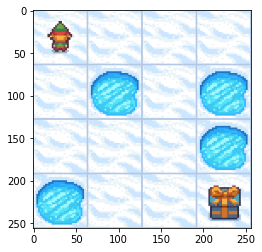

In [154]:
## Loading the environment
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)
observation, info = env.reset(return_info=True)

# Performing an action
action = random.randint(0, env.action_space.n - 1)
observation, reward, done, info = env.step(action)

# Displaying the first frame of the game
plt.imshow(env.render(mode='rgb_array'))

# Printing game info
print(f"actions: {env.action_space.n}\nstates: {env.observation_space.n}")
print(f"Current state: {observation}")

# Closing the environment
env.close()

In this environment, there are **4 possible actions** for each of the **16 possible states**.\
Feel free to play around with the code above to get a better understanding of the API.

## 3. Solving the environment

In [155]:
def game_loop(env, qTable, action):
    new_state, reward, done, info = env.step(action)
    ## Use the qFunc() function you wrote above to change the Q-Table
    ## All of the arguments needed for the qFunc() function can be found inside this loop
    qTable[state, action] = qFunc(state=state, action=action, newState=new_state, qTable=qTable, reward=reward)
    ##
    return qTable, new_state, done, reward

    # answer = qFunc(state=state, action=action, newState=new_state, qTable=qTable, reward=reward)

In [156]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)
qTable = np.zeros((env.observation_space.n, env.action_space.n))

state, info = env.reset(return_info=True)
while (True):
    env.render()
    action = random.randint(0, env.action_space.n - 1)
    qTable, state, done, reward = game_loop(env, qTable, action)
    if done:
        break
env.close()

Now, to see if it works, we will launch the environment 1000 times and see how the Q-Table evolves.

In [157]:
EPOCH = 10000

env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)
qTable = np.zeros((env.observation_space.n, env.action_space.n))

for i in range(EPOCH):
    state, info = env.reset(return_info=True)
    while (True):
        # This time, we won't render the game each frame because it would take too long
        action = random.randint(0, env.action_space.n - 1)
        qTable, state, done, reward = game_loop(env, qTable, action)
        if done:
            break
env.close()

for states in qTable:
    for actions in states:
        if (actions == max(states)):
            print("\033[4m", end="")
        else:
            print("\033[0m", end="")
        if (actions > 0):
            print("\033[92m", end="")
        else:
            print("\033[00m", end="")
        print(round(actions, 3), end="\t")
    print()

0.94	0.949	0.949	0.94	
0.94	0.0	0.959	0.949	
0.949	0.969	0.949	0.959	
0.958	0.0	0.948	0.948	
0.949	0.958	0.0	0.94	
0.0	0.0	0.0	0.0	
0.0	0.979	0.0	0.958	
0.0	0.0	0.0	0.0	
0.958	0.0	0.968	0.949	
0.957	0.978	0.978	0.0	
0.966	0.989	0.0	0.966	
0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	
0.0	0.975	0.989	0.961	
0.971	0.988	1.0	0.966	
0.0	0.0	0.0	0.0	


Great ! We now have a nice Q-Table that knows which action is best for each state.\
Let's try to test it and see what happens:

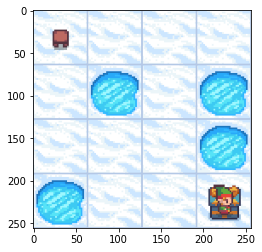

In [158]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)

state, info = env.reset(return_info=True)
while (True):
    env.render()
    action = np.where(qTable[state] == max(qTable[state]))[0][0]
    qTable, state, done, reward = game_loop(env, qTable, action)
    if done:
        break

# Displaying the last frame of the game
plt.imshow(env.render(mode='rgb_array'))

env.close()

If all went well, our AI should easily reach its goal !

But we're not done...\
You might have noticed that when we load our environment, we give it a certain argument:\
`is_slippery=False`

This argument makes the game far easier !
If you want a real challenge, set it to true.

You might run into some problems, for example, maybe your AI might just get stuck because none of its actions are better than the others.\
In order to avoid this problem, we can use the Epsilon-Greedy strategy!

```
epsilon = 0.9
random = random()
if (random > epsilon):
    greedy_action()
else:
    random_action()
```

Try to implement this into the following function that we'll use to determine which action the AI will choose:

In [159]:
def chooseAction(epsilon, qTable, state):
    ## write some code that returns either a random action or the best action
    if (random.random() > epsilon):
        return np.where(qTable[state] == max(qTable[state]))[0][0]
    else:
        return random.randint(0, 3)

58.0% winrate
58.0


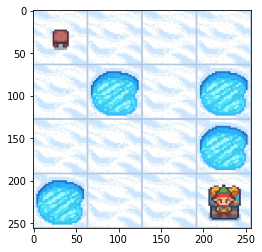

In [162]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=True)
qTable = np.zeros((env.observation_space.n, env.action_space.n))

epsilon = 1.0

EPOCH = 10000

for i in range(EPOCH):
    epsilon = max(epsilon - 0.0001, 0)
    state, info = env.reset(return_info=True)
    while (True):
        action = chooseAction(epsilon, qTable, state)
        qTable, state, done, reward = game_loop(env, qTable, action)
        if done:
            break
env.close()

env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=True)

wins = 0.0

for i in range(100):
    state, info = env.reset(return_info=True)
    while (True):
        action = chooseAction(0, qTable, state)
        _, state, done, reward = game_loop(env, qTable, action)
        if done:
            if (reward > 0):
                wins += 1
            break
env.close()

print(f"{round(wins / (i+1) * 100, 2)}% winrate")
print(wins)

# Displaying the last frame of the game
plt.imshow(env.render(mode='rgb_array'))

env.close()